<h2 style='color:red' align='center'>BigMart : build a predictive model and find out the sales of each product at a particular store</h2>

# 1). Problem Statement
- <p>The data scientists at <strong>BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities</strong> . Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.</p>

# 2 Hypothesis Generation

- Larger stores may have more product variety and inventory, attracting a larger customer base and leading to higher overall sales.
- Higher visibility can attract more attention from customers, resulting in increased sales for those products.
- Larger stores may have more product variety and inventory, attracting a larger customer base and leading to higher overall sales.
- Supermarkets typically offer a wider range of products, which may result in higher sales compared to grocery stores.

# 3 . Data Collection 

### 3.1 Loading Packages and Data


####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [145]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


# Modelling
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor
import warnings

 

#### Import Our Data 

In [2]:
train_data = pd.read_csv('data/Train.csv')
test_data = pd.read_csv('data/Test.csv')

In [3]:

# Add a 'Condition' column to identify train and test data
train_data['Condition'] = 'Train'
test_data['Condition'] = 'Test'

# Merge the train and test data
df = pd.concat([train_data, test_data], ignore_index=True)

df.sample(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
11420           NCS38        8.600          Low Fat         0.150962   
11521           FDD48       10.395          Low Fat         0.030153   
12407           FDA47       10.500          Regular         0.116855   
3133            FDY37       17.000          Regular         0.026564   
3867            FDY38       13.600          Regular         0.119077   

          Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
11420     Household  114.1176            OUT010                       1998   
11521  Baking Goods  114.5176            OUT035                       2004   
12407  Baking Goods  163.6210            OUT049                       1999   
3133         Canned  141.2470            OUT035                       2004   
3867          Dairy  231.2300            OUT013                       1987   

      Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
11420         NaN               Tier 3      Grocery Store                NaN   
11521       Small               Tier 2  Supermarket Type1                NaN   
12407      Medium               Tier 1  Supermarket Type1                NaN   
3133        Small               Tier 2  Supermarket Type1           3292.381   
3867         High               Tier 3  Supermarket Type1           2330.300   

      Condition  
11420      Test  
11521      Test  
12407      Test  
3133      Train  
3867      Train

In [4]:
print(f'the shape is : {df.shape}')

the shape is : (14204, 13)


### 3.2 Data Structure and Content

#### Data Information 

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Condition'],
      dtype='object')

#### Data Structure

In [6]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales Condition  
0  Supermarket Type1          3735.1380     Train  
1  Supermarket Type2           443.4228     Train  
2  Supermarket Type1          2097.2700     Train  
3      Grocery Store           732.3800     Train  
4  Supermarket Type1           994.7052     Train

In [7]:
df.shape

(14204, 13)

#####  Checking Missing Values 

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Condition                       0
dtype: int64

In [9]:

missing_value_counts = df.isnull().sum().sum()
number_of_row = np.product(df.shape)
percent_missing = (missing_value_counts/number_of_row) *100
print(f'the percent_missing of Missing Values : {percent_missing.round(2)}%')
print('''We can see that we two column have the missing values : 
 - for numurical values 'Item_Weight ' 
 - categorial values  'Outlet_Size ''')

the percent_missing of Missing Values : 6.57%
We can see that we two column have the missing values : 
 - for numurical values 'Item_Weight ' 
 - categorial values  'Outlet_Size 


<Axes: >

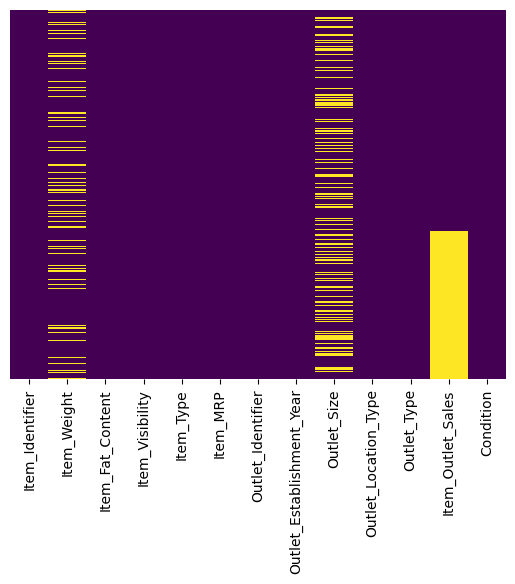

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#####  Check Duplicates

In [11]:
df.duplicated().sum()

0

As we can there are no duplicate in our data set 

#####  Check data type

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Condition                  14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

##### Check the number of unique values of each column

In [13]:
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
Condition                        2
dtype: int64

##### Check statistics of data set

In [14]:
df.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

<strong>Insights <strong>
<hr>
 *  All items have non-zero visibility 0% - 32% , but some have visibility values of zero. that mean the items has sold 
 <hr>
  * dataset contains data from stores established between 1985 and 2009.
<hr>


##### Check various categories present in the different categorical column


In [15]:
print("Categories in 'Item_Fat_Content' variable:     ",end=" " )
print(df['Item_Fat_Content'].unique())

print("Categories in 'Item_Type' variable:  ",end=" ")
print(df['Item_Type'].unique())

print("Categories in 'Outlet_Size' variable:",end=" " )
print(df['Outlet_Size'].unique())

print("Categories in 'Outlet_Location_Type' variable:     ",end=" " )
print(df['Outlet_Location_Type'].unique())

print("Categories in 'Outlet_Type' variable:     ",end=" " )
print(df['Outlet_Type'].unique())

Categories in 'Item_Fat_Content' variable:      ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Categories in 'Item_Type' variable:   ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Categories in 'Outlet_Size' variable: ['Medium' nan 'High' 'Small']
Categories in 'Outlet_Location_Type' variable:      ['Tier 1' 'Tier 3' 'Tier 2']
Categories in 'Outlet_Type' variable:      ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [16]:
numerical_column = [column for column in df.columns if df[column].dtype != 'O' ]
categoriel_col = [column for column in df.columns if df[column].dtype == 'O']

print(f'We have {len(numerical_column)} numerical features : {numerical_column}')
print(f'We have {len(categoriel_col)} categorial features : {categoriel_col}')

We have 5 numerical features : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
We have 8 categorial features : ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Condition']


# 4 . EDA

In [17]:
df.sample(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
2834            FDA31        7.100               LF         0.110460   
2146            DRO47       10.195          Low Fat         0.112682   
13864           NCK06        5.030          Low Fat         0.008660   
12010           FDM38        5.885          Regular         0.092959   
7077            FDJ50        8.645          Low Fat         0.021620   

                   Item_Type  Item_MRP Outlet_Identifier  \
2834   Fruits and Vegetables  172.1080            OUT018   
2146             Hard Drinks  113.9860            OUT018   
13864              Household  120.2756            OUT049   
12010                 Canned   52.6982            OUT045   
7077                  Canned   50.6982            OUT049   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
2834                        2009      Medium               Tier 3   
2146                        2009      Medium               Tier 3   
13864                       1999      Medium               Tier 1   
12010                       2002         NaN               Tier 2   
7077                        1999      Medium               Tier 1   

             Outlet_Type  Item_Outlet_Sales Condition  
2834   Supermarket Type2          2250.4040     Train  
2146   Supermarket Type2           452.7440     Train  
13864  Supermarket Type1                NaN      Test  
12010  Supermarket Type1                NaN      Test  
7077   Supermarket Type1           736.3748     Train

In [18]:
numerical_column

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [19]:
df1 = df.copy()

## Handling Outliers 

<Axes: xlabel='Item_Visibility'>

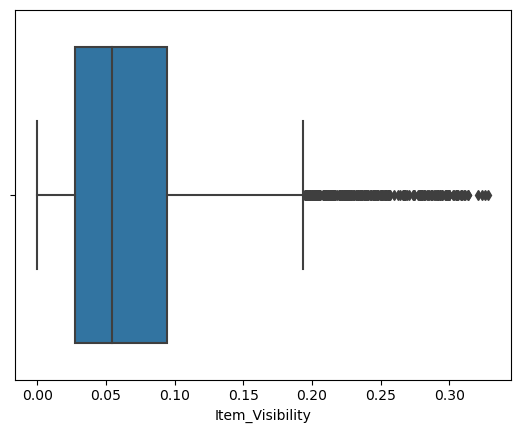

In [20]:
sns.boxplot(x=df['Item_Visibility'])

<function matplotlib.pyplot.show(close=None, block=None)>

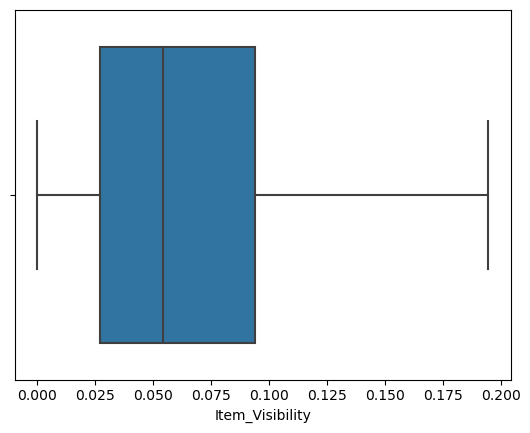

In [21]:
def replace_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_ranger=Q1-(1.5*IQR)
  upper_ranger=Q3+(1.5*IQR)
  return lower_ranger, upper_ranger
lowVisibility, uppVisibility = replace_outlier(df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']>uppVisibility,uppVisibility,df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']<lowVisibility,lowVisibility,df['Item_Visibility'])
sns.boxplot(x=df['Item_Visibility'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

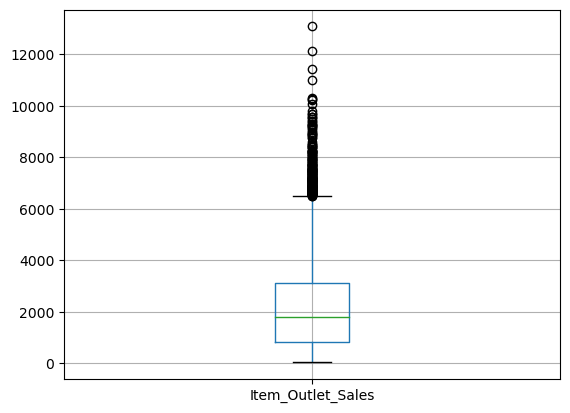

In [22]:
df.boxplot(column=['Item_Outlet_Sales'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

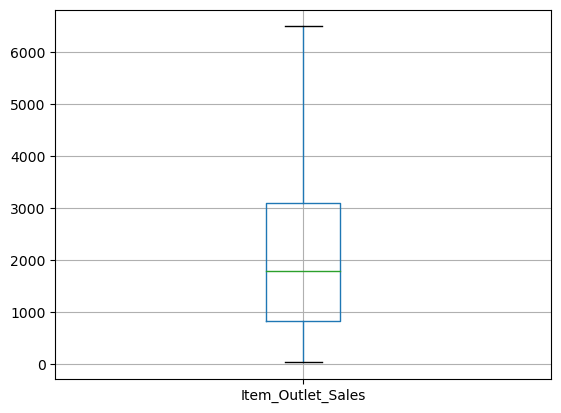

In [23]:
lowOutlet_Sales, uppOutlet_Sales = replace_outlier(df['Item_Outlet_Sales'])
df['Item_Outlet_Sales']=np.where(df['Item_Outlet_Sales']>uppOutlet_Sales,uppOutlet_Sales,df['Item_Outlet_Sales'])
df['Item_Outlet_Sales']=np.where(df['Item_Outlet_Sales']<lowOutlet_Sales,lowOutlet_Sales,df['Item_Outlet_Sales'])
df.boxplot(column=['Item_Outlet_Sales'])
plt.show

* Insights 

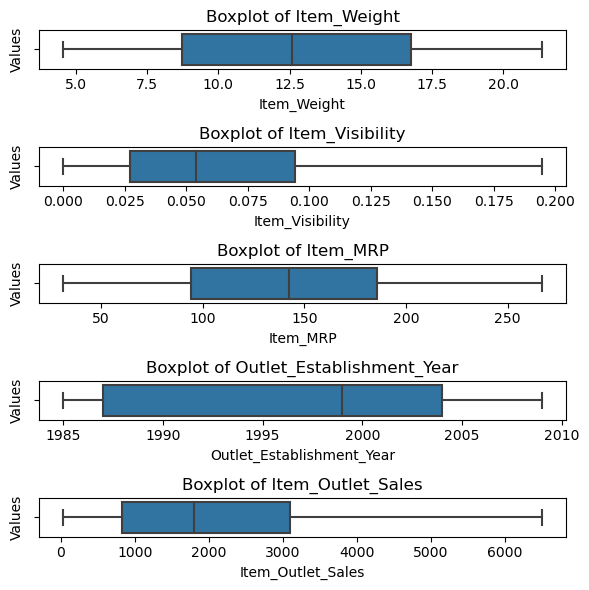

In [24]:

# Define the columns to visualize outliers
columns_to_visualize = numerical_column

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(numerical_column), figsize=(6, 6))

# Iterate over the columns and create boxplots to visualize outliers
for i, column in enumerate(numerical_column):
    ax = axes[i]
    
    # Create a boxplot for the column
    sns.boxplot(x=df[column], ax=ax)
    
    # Add labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Values')
    ax.set_title(f'Boxplot of {column}')
    
    

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Handling Missing Values 

#### Numirecal Features 

In [25]:
Item_Weight_median = df1['Item_Weight'].median()


In [26]:
df1['Item_Weight'].replace(np.nan , Item_Weight_median , inplace=True)

#### Categorial features 

In [27]:
Outlet_Size_mode = df1['Outlet_Size'].mode().values[0]

In [28]:

df1['Outlet_Size']= df1['Outlet_Size'].replace(np.nan ,Outlet_Size_mode )

### Univariate Analysis

In [29]:
from pandas_profiling import ProfileReport

In [30]:
profile = ProfileReport(df1)

In [31]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Bivariate Analysis

In [32]:
df1.sample()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
6170           FDN49        17.25          Regular         0.125224   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
6170  Breakfast    41.248            OUT046                       1997   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
6170       Small               Tier 1  Supermarket Type1            679.116   

     Condition  
6170     Train

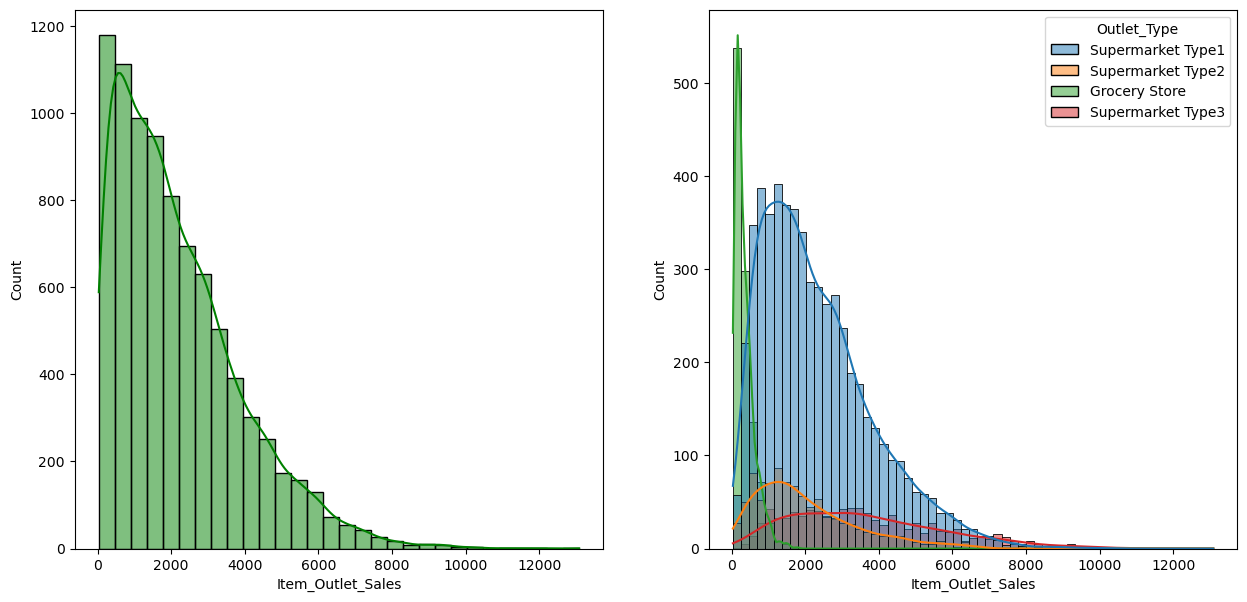

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='Item_Outlet_Sales',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df1,x='Item_Outlet_Sales',kde=True,hue='Outlet_Type')


plt.show()

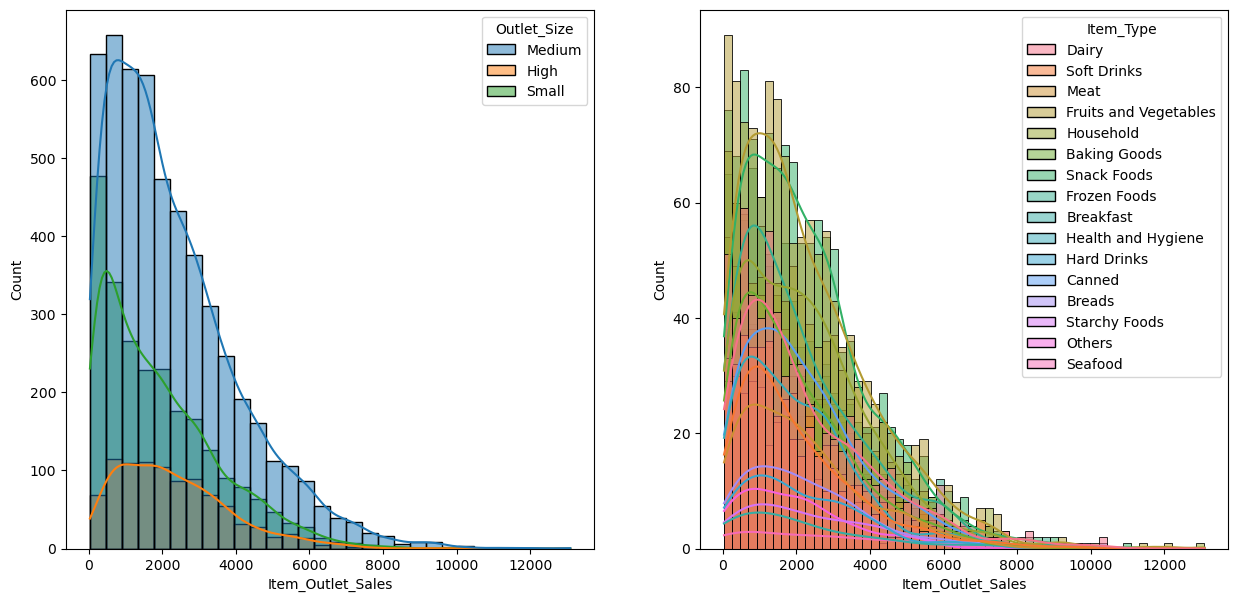

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='Item_Outlet_Sales',bins=30,kde=True,hue='Outlet_Size')
plt.subplot(122)
sns.histplot(data=df1,x='Item_Outlet_Sales',kde=True,hue='Item_Type')


plt.show()

Text(0.5, 1.0, 'In each Market, What s the total of Items')

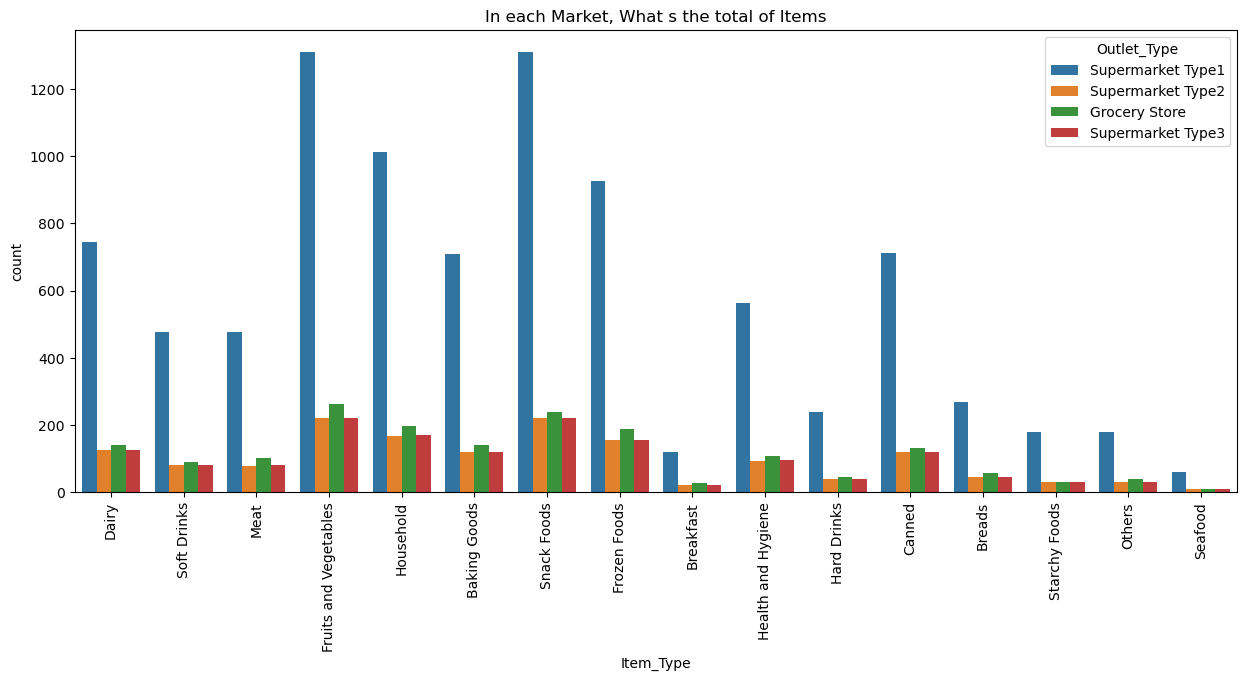

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(data=df , x=df['Item_Type'] , hue=df['Outlet_Type'] )
plt.xticks(rotation=90)
plt.title('In each Market, What s the total of Items')

In [36]:
fig = px.bar(data_frame=df1, 
      x=df1.groupby('Outlet_Type').sum()['Item_Outlet_Sales'].index , 
      y= df1.groupby('Outlet_Type').sum()['Item_Outlet_Sales'].values , 
     
     )
fig.update_xaxes(title ='Supermarket')
fig.update_yaxes(title ='Sum of Sales in each Market')
fig.show()

<Axes: xlabel='Outlet_Identifier'>

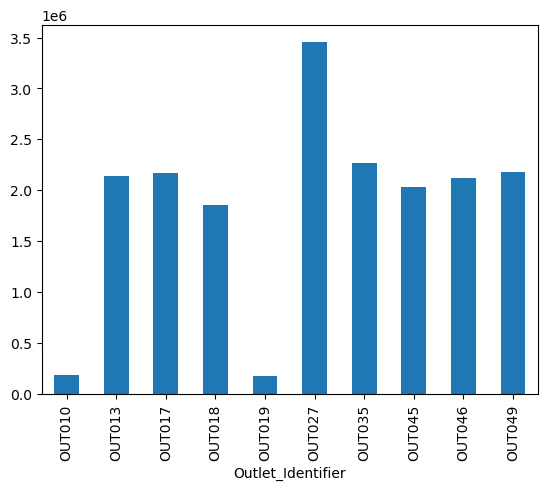

In [65]:
df2.groupby('Outlet_Identifier').sum()['Item_Outlet_Sales'].plot(kind='bar')

# 5 .Feature Engineering

In [37]:
df2 = df1.copy()

In [38]:
df2.sample()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
13194           NCT54        8.695          Low Fat              0.0   

       Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
13194  Household   96.0094            OUT010                       1998   

      Outlet_Size Outlet_Location_Type    Outlet_Type  Item_Outlet_Sales  \
13194      Medium               Tier 3  Grocery Store                NaN   

      Condition  
13194      Test

* Item_Fat_Content

In [39]:
df2['Item_Fat_Content'].replace(['reg'], 'Regular', inplace=True)

In [40]:
df2['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat', inplace=True)

<Axes: >

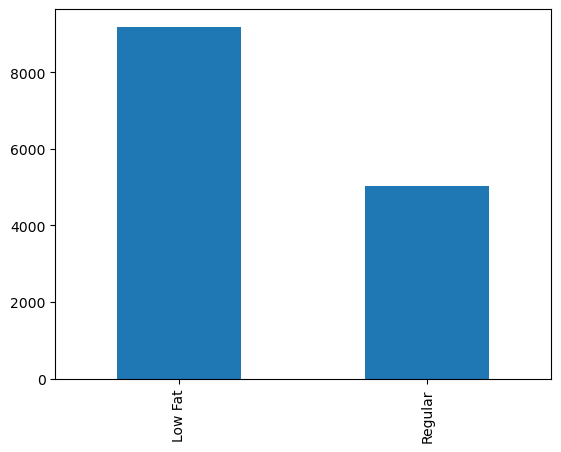

In [41]:
df2['Item_Fat_Content'].value_counts().plot(kind='bar')

### One Hot encoding 

* Item_Type

In [66]:
df2 =pd.get_dummies(df2, columns=['Item_Type'])

In [67]:
df2

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

       Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0      249.8092            OUT049                       1999      Medium   
1       48.2692            OUT018                       2009      Medium   
2      141.6180            OUT049                       1999      Medium   
3      182.0950            OUT010                       1998      Medium   
4       53.8614            OUT013                       1987        High   
...         ...               ...                        ...         ...   
14199  141.3154            OUT046                       1997       Small   
14200  169.1448            OUT018                       2009      Medium   
14201  118.7440            OUT045                       2002      Medium   
14202  214.6218            OUT017                       2007      Medium   
14203   79.7960            OUT045                       2002      Medium   

      Outlet_Location_Type        Outlet_Type  ...  \
0                   Tier 1  Supermarket Type1  ...   
1                   Tier 3  Supermarket Type2  ...   
2                   Tier 1  Supermarket Type1  ...   
3                   Tier 3      Grocery Store  ...   
4                   Tier 3  Supermarket Type1  ...   
...                    ...                ...  ...   
14199               Tier 1  Supermarket Type1  ...   
14200               Tier 3  Supermarket Type2  ...   
14201               Tier 2  Supermarket Type1  ...   
14202               Tier 2  Supermarket Type1  ...   
14203               Tier 2  Supermarket Type1  ...   

       Item_Type_Fruits and Vegetables Item_Type_Hard Drinks  \
0                                    0                     0   
1                                    0                     0   
2                                    0                     0   
3                                    1                     0   
4                                    0                     0   
...                                ...                   ...   
14199                                0                     0   
14200                                0                     0   
14201                                0                     0   
14202                                0                     0   
14203                                0                     0   

       Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
0                                 0                    0               0   
1                                 0                    0               0   
2                                 0                    0               1   
3                                 0                    0               0   
4                                 0                    1               0   
...                             ...                  ...             ...   
14199                             0                    0               0   
14200                             0                    0               0   
14201                             1                    0               0   
14202                             0               

## Label Encoding 

In [68]:
def labelEncoding(df):
  df['Outlet_Type_Encoded']  = df['Outlet_Type'].replace({'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3})
  df['Outlet_Location_Type_Encoded']  = df['Outlet_Location_Type'].replace({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})
  df['Item_Fat_Content_Encoded']  = df['Item_Fat_Content'].replace({'Low Fat': 1, 'Regular': 0})
  df['Outlet_Size_Encoded']  = df['Outlet_Size'].replace({'Small': 0, 'Medium': 1, 'High': 2})
  return df

In [69]:
labelEncoding(df2)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

       Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0      249.8092            OUT049                       1999      Medium   
1       48.2692            OUT018                       2009      Medium   
2      141.6180            OUT049                       1999      Medium   
3      182.0950            OUT010                       1998      Medium   
4       53.8614            OUT013                       1987        High   
...         ...               ...                        ...         ...   
14199  141.3154            OUT046                       1997       Small   
14200  169.1448            OUT018                       2009      Medium   
14201  118.7440            OUT045                       2002      Medium   
14202  214.6218            OUT017                       2007      Medium   
14203   79.7960            OUT045                       2002      Medium   

      Outlet_Location_Type        Outlet_Type  ...  Item_Type_Meat  \
0                   Tier 1  Supermarket Type1  ...               0   
1                   Tier 3  Supermarket Type2  ...               0   
2                   Tier 1  Supermarket Type1  ...               1   
3                   Tier 3      Grocery Store  ...               0   
4                   Tier 3  Supermarket Type1  ...               0   
...                    ...                ...  ...             ...   
14199               Tier 1  Supermarket Type1  ...               0   
14200               Tier 3  Supermarket Type2  ...               0   
14201               Tier 2  Supermarket Type1  ...               0   
14202               Tier 2  Supermarket Type1  ...               0   
14203               Tier 2  Supermarket Type1  ...               0   

      Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
0                    0                  0                      0   
1                    0                  0                      0   
2                    0                  0                      0   
3                    0                  0                      0   
4                    0                  0                      0   
...                ...                ...                    ...   
14199                0                  0                      1   
14200                0                  0                      0   
14201                0                  0                      0   
14202                0                  0                      0   
14203                0                  0                      0   

       Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Type_Encoded  \
0                          0                        0                    1   
1                          1                        0                    2   
2                          0                        0                    1   
3                          0                        0                    0   
4                          0                        0                    1   
...                      ...                      ...                  ...   
14199                   

### Ordinal_Encoder

In [71]:
def Ordinal_Encoder(df, cols):
  ordinal_encoder = OrdinalEncoder()
  df[cols] = ordinal_encoder.fit_transform(df[cols])
  return df

In [72]:
df2 = Ordinal_Encoder(df2, ['Outlet_Identifier'])

In [92]:

df2.sample()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP  \
9514           FDP59        20.85          Regular         0.056419  105.7648   

      Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
9514                1.0                         26        High   

     Outlet_Location_Type        Outlet_Type  ...  Item_Type_Meat  \
9514               Tier 3  Supermarket Type1  ...               0   

     Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
9514                0                  0                      0   

      Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Type_Encoded  \
9514                      0                        0                    1   

      Outlet_Location_Type_Encoded  Item_Fat_Content_Encoded  \
9514                             3                         0   

      Outlet_Size_Encoded  
9514                    2  

[1 rows x 32 columns]

### Date 

In [79]:
df2['Outlet_Establishment_Year']  = df2['Outlet_Establishment_Year'].apply(lambda x : 2013 - x)

In [93]:
df2=df2.drop(columns=['Outlet_Type', 'Outlet_Location_Type','Item_Fat_Content','Outlet_Size'])

In [98]:
df3 = df2.copy()

## Standart Scaler 

In [110]:
# Select the columns you want to scale
columns_to_normalize = ['Item_Weight', 'Item_Visibility']

# Create a DataFrame with the columns you want to normalize
data_to_normalize = df3[columns_to_normalize]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
normalized_data = scaler.fit_transform(data_to_normalize)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)






In [112]:
# Concatenate the normalized DataFrame with the remaining columns
final_data = pd.concat([df3.drop(columns_to_normalize, axis=1), normalized_df], axis=1)

1.0

In [117]:
final_data.set_index('Item_Identifier')

Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
Item_Identifier                                                           
FDA15            249.8092                9.0                         14   
DRC01             48.2692                3.0                          4   
FDN15            141.6180                9.0                         14   
FDX07            182.0950                0.0                         15   
NCD19             53.8614                1.0                         26   
...                   ...                ...                        ...   
FDB58            141.3154                8.0                         16   
FDD47            169.1448                3.0                          4   
NCO17            118.7440                7.0                         11   
FDJ26            214.6218                2.0                          6   
FDU37             79.7960                7.0                         11   

                 Item_Outlet_Sales Condition  Item_Type_Baking Goods  \
Item_Identifier                                                        
FDA15                    3735.1380     Train                       0   
DRC01                     443.4228     Train                       0   
FDN15                    2097.2700     Train                       0   
FDX07                     732.3800     Train                       0   
NCD19                     994.7052     Train                       0   
...                            ...       ...                     ...   
FDB58                          NaN      Test                       0   
FDD47                          NaN      Test                       0   
NCO17                          NaN      Test                       0   
FDJ26                          NaN      Test                       0   
FDU37                          NaN      Test                       0   

                 Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  \
Item_Identifier                                                            
FDA15                           0                    0                 0   
DRC01                           0                    0                 0   
FDN15                           0                    0                 0   
FDX07                           0                    0                 0   
NCD19                           0                    0                 0   
...                           ...                  ...               ...   
FDB58                           0                    0                 0   
FDD47                           0                    0                 0   
NCO17                           0                    0                 0   
FDJ26                           0                    0                 1   
FDU37                           0                    0                 1   

                 Item_Type_Dairy  ...  Item_Type_Seafood  \
Item_Identifier                   ...                      
FDA15                          1  ...                  0   
DRC01                          0  ...                  0   
FDN15                          0  ...                  0   
FDX07                          0  ...                  0   
NCD19                          0  ...                  0   
...                          ...  ...                ...   
FDB58                          0  ...                  0   
FDD47                          0  ...                  0   
NCO17                          0  ...                  0   
FDJ26                          0  ...                  0   
FDU37                          0  ...                  0   

                 Item_Type_Snack Foods  Item_Type_Soft Drinks  \
Item_Identifier                                                 
FDA15                                0                      0   
DRC01                                0                      1   
FDN15                                0                      0   
FDX07    

# 6. Model 

In [118]:
final_data.sample()

Item_Identifier  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
9561           FDT31  188.8872                5.0                         28   

      Item_Outlet_Sales Condition  Item_Type_Baking Goods  Item_Type_Breads  \
9561                NaN      Test                       0                 0   

      Item_Type_Breakfast  Item_Type_Canned  ...  Item_Type_Seafood  \
9561                    0                 0  ...                  0   

      Item_Type_Snack Foods  Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
9561                      0                      0                        0   

      Outlet_Type_Encoded  Outlet_Location_Type_Encoded  \
9561                    3                             3   

      Item_Fat_Content_Encoded  Outlet_Size_Encoded  Item_Weight  \
9561                         1                    1     0.479012   

      Item_Visibility  
9561         0.037723  

[1 rows x 28 columns]

In [119]:
train_data = final_data.loc[final_data['Condition'] =='Train']

In [120]:
test_data = final_data.loc[final_data['Condition'] =='Test']

In [122]:
train_data.drop(['Item_Identifier' , 'Condition'] , axis=1)

Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0     249.8092                9.0                         14   
1      48.2692                3.0                          4   
2     141.6180                9.0                         14   
3     182.0950                0.0                         15   
4      53.8614                1.0                         26   
...        ...                ...                        ...   
8518  214.5218                1.0                         26   
8519  108.1570                7.0                         11   
8520   85.1224                6.0                          9   
8521  103.1332                3.0                          4   
8522   75.4670                8.0                         16   

      Item_Outlet_Sales  Item_Type_Baking Goods  Item_Type_Breads  \
0             3735.1380                       0                 0   
1              443.4228                       0                 0   
2             2097.2700                       0                 0   
3              732.3800                       0                 0   
4              994.7052                       0                 0   
...                 ...                     ...               ...   
8518          2778.3834                       0                 0   
8519           549.2850                       1                 0   
8520          1193.1136                       0                 0   
8521          1845.5976                       0                 0   
8522           765.6700                       0                 0   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
0                       0                 0                1   
1                       0                 0                0   
2                       0                 0                0   
3                       0                 0                0   
4                       0                 0                0   
...                   ...               ...              ...   
8518                    0                 0                0   
8519                    0                 0                0   
8520                    0                 0                0   
8521                    0                 0                0   
8522                    0                 0                0   

      Item_Type_Frozen Foods  ...  Item_Type_Seafood  Item_Type_Snack Foods  \
0                          0  ...                  0                      0   
1                          0  ...                  0                      0   
2                          0  ...                  0                      0   
3                          0  ...                  0                      0   
4                          0  ...                  0                      0   
...                      ...  ...                ...                    ...   
8518                       0  ...                  0                      1   
8519                       0  ...                  0                      0   
8520                       0  ...                  0                      0   
8521                       0  ...                  0                      1   
8522                       0  ...                  0                      0   

      Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Type_Encoded  \
0                         0                        0                    1   
1                         1                        0                    2   
2                         0                        0                    1   
3                         0                        0                    0   
4                         0                        0                    1   
...                     ...                      ...                  ...   
8518                      0                        0                    1   
8519                      0                        0                    1 

In [124]:
test_data.drop(['Item_Identifier' , 'Condition' , 'Item_Outlet_Sales' , ''] , axis=1)

Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
8523   107.8622                9.0                         14   
8524    87.3198                2.0                          6   
8525   241.7538                0.0                         15   
8526   155.0340                2.0                          6   
8527   234.2300                5.0                         28   
...         ...                ...                        ...   
14199  141.3154                8.0                         16   
14200  169.1448                3.0                          4   
14201  118.7440                7.0                         11   
14202  214.6218                2.0                          6   
14203   79.7960                7.0                         11   

       Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
8523                        0                 0                    0   
8524                        0                 0                    0   
8525                        0                 0                    0   
8526                        0                 0                    0   
8527                        0                 0                    0   
...                       ...               ...                  ...   
14199                       0                 0                    0   
14200                       0                 0                    0   
14201                       0                 0                    0   
14202                       0                 0                    0   
14203                       0                 0                    0   

       Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
8523                  0                0                       0   
8524                  0                1                       0   
8525                  0                0                       0   
8526                  0                0                       0   
8527                  0                1                       0   
...                 ...              ...                     ...   
14199                 0                0                       0   
14200                 0                0                       0   
14201                 0                0                       0   
14202                 1                0                       0   
14203                 1                0                       0   

       Item_Type_Fruits and Vegetables  ...  Item_Type_Seafood  \
8523                                 0  ...                  0   
8524                                 0  ...                  0   
8525                                 0  ...                  0   
8526                                 0  ...                  0   
8527                                 0  ...                  0   
...                                ...  ...                ...   
14199                                0  ...                  0   
14200                                0  ...                  0   
14201                                0  ...                  0   
14202                                0  ...                  0   
14203                                0  ...                  0   

       Item_Type_Snack Foods  Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
8523                       1                      0                        0   
8524                       0                      0                        0   
8525                       0                      0                        0   
8526                       1                      0                        0   
8527                       0                      0                        0   
...                      ...                    ...                      ...   
14199                      1                      0                        0   
14200                      0                      0                        1   
14201                      0   

## Split the data 

In [193]:
X_train = train_data.drop(['Item_Outlet_Sales' ,'Item_Identifier' ,'Condition'], axis= 1 )
y_train = train_data['Item_Outlet_Sales']

## linear_regression

In [194]:
def perform_linear_regression(X_train, y_train, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)
    
    # Create a Linear Regression model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print the evaluation metrics
    print("Training MSE:", train_mse)
    print("Testing MSE:", test_mse)
    print("Training MAE:", train_mae)
    print("Testing MAE:", test_mae)
    print("Training R^2:", train_r2)
    print("Testing R^2:", test_r2)
    
    # Return the trained model and the test data
    return model, X_test, y_test


## Random Forest 

In [195]:
def perform_random_forest_regression(X_train, y_train, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)
    
    # Create a Random Forest Regression model
    model = RandomForestRegressor(random_state=random_state)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Create a table of evaluation metrics
    table = [
        ["MSE", train_mse, test_mse],
        ["MAE", train_mae, test_mae],
        ["R^2", train_r2, test_r2]
    ]
    
    # Print the table
    print(tabulate(table, headers=["Metric", "Training", "Testing"], tablefmt="grid"))
    
    


## Xgboot

In [196]:
def perform_xgboost_regression(X_train, y_train, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)
    
    # Create an XGBoost Regression model
    model = XGBRegressor(random_state=random_state)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Create a table of evaluation metrics
    table = [
        ["MSE", train_mse, test_mse],
        ["MAE", train_mae, test_mae],
        ["R^2", train_r2, test_r2]
    ]
    
    # Print the table
    print(tabulate(table, headers=["Metric", "Training", "Testing"], tablefmt="grid"))
    
    # Return the trained model and the test data
    return model, X_test, y_test


# 7.  Summary 

## linear-regression

In [197]:
perform_linear_regression(X_train , y_train)

Training MSE: 1458091.2858397223
Testing MSE: 1296030.6666911987
Training MAE: 907.9168199829842
Testing MAE: 856.7790497102015
Training R^2: 0.507076902161578
Testing R^2: 0.5231622737094845


(LinearRegression(),
       Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
 7503   79.4302                1.0                         26   
 2957   42.7086                8.0                         16   
 7031   42.0454                9.0                         14   
 1084  173.7054                5.0                         28   
 856   197.5110                6.0                          9   
 ...        ...                ...                        ...   
 7205  127.1704                8.0                         16   
 3257  148.1734                3.0                          4   
 6346   42.0454                1.0                         26   
 6318   50.5008                3.0                          4   
 6339  109.2254                7.0                         11   
 
       Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
 7503                       0                 0                    0   
 2957                       0                 0      

## random_forest

In [198]:
perform_random_forest_regression(X_train , y_train)

+----------+---------------+---------------+
| Metric   |      Training |       Testing |
+==========+===============+===============+
| MSE      | 186845        |   1.18565e+06 |
+----------+---------------+---------------+
| MAE      |    299.612    | 758.91        |
+----------+---------------+---------------+
| R^2      |      0.936835 |   0.563775    |
+----------+---------------+---------------+


## xgboost

In [199]:
perform_xgboost_regression(X_train, y_train)

+----------+---------------+---------------+
| Metric   |      Training |       Testing |
+==========+===============+===============+
| MSE      | 439455        |   1.23188e+06 |
+----------+---------------+---------------+
| MAE      |    475.282    | 773.903       |
+----------+---------------+---------------+
| R^2      |      0.851438 |   0.546765    |
+----------+---------------+---------------+


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...),
       Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
 7503   79.4302                1.0                         26   
 2957   42.7086                8.0                         16   
 7031   42.0454                9.0                    